In [136]:
!pip install ydata-profiling

DEPRECATION: Loading egg at /Users/mac/anaconda3/lib/python3.11/site-packages/python_docx-1.1.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/mac/anaconda3/lib/python3.11/site-packages/Pattern-3.6.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [137]:
import re
import string
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from ydata_profiling import ProfileReport

In [138]:
"""
This Clas handles the text in the dataset
- it's used to a manipulate textual data
"""


class TextWrangler:
    def __init__(self):
        self.count = CountVectorizer()
        self.tf_idf_ = TfidfVectorizer()
        self.spacy_en = spacy.load('en_core_web_sm')
        # Download stopwords if not already downloaded
        try:
            self.stop_words = set(stopwords.words('english'))
        except LookupError:
            import nltk
            nltk.download('stopwords')
            nltk.download('punkt')
            self.stop_words = set(stopwords.words('english'))

    @staticmethod
    def remove_digit(text: str) -> str:
        """
        This method removes digit from a text
        """
        return re.sub(r'\d+', '', text)

    @staticmethod
    def remove_punctuations(text: str) -> str:
        """
        This method removes punctuation from a text
        """
        return text.translate(str.maketrans('', '', string.punctuation))

    @staticmethod
    def clean_text(text: str) -> str:
        """
        Clean the text and remove punctuations.
        """
        text = re.sub('<.*?>', '', text)
        text = re.sub('[^A-Za-z0-9]+', ' ', text)
        return text.lower()

    @staticmethod
    def word_lengthening(text: str) -> str:
        """
        Fix a word by reducing any character repeated three or more times
        to just two instances of that character.
        """
        return re.sub(r'(.)\1{2,}', r'\1\1', text.strip())

    @staticmethod
    def tokenize(text: str) -> List[str]:
        """
        Tokenize the given text into words.
        """
        return word_tokenize(text)

    def remove_stopwords(self, text: str) -> str:
        """
        Remove stop words from a given text.
        """
        filtered_text = [word for word in self.tokenize(text) if word.lower() not in self.stop_words]
        return ' '.join(filtered_text)

    def lemmatizer(self, text: str) -> str:
        """
        This method lemmatize a text by using the spaCy libary
        """
        text = self.spacy_en(text)

        # get the lemmatized token from text
        lemmatized_tokens = [token.lemma_ for token in text]

        # use lemmatized token to form a sentence
        return ' '.join(lemmatized_tokens)

    def init_bag_of_words(self, end_range: int):
        """
        This method initialize Bag of Words with n_gram end range which can be 1, 2 or 3
        """
        self.count = CountVectorizer(ngram_range=(1, end_range))
        return self.count

    def bag_of_words(self, text: List[str]):
        """
        Compute the Bag of Words matrix for the given list of texts.
        """
        return self.count.fit_transform(text)

    def init_tf_idf(self, end_range: int):
        """
        This method initialize TF-IDF with n_gram end range which can be 1, 2 or 3
        """
        self.tf_idf_ = TfidfVectorizer(ngram_range=(1, end_range))
        return self.tf_idf_

    def tf_idf(self, text: List[str]):
        """
        Compute the TF-IDF matrix for the given list of texts.
        """
        return self.tf_idf_.fit_transform(text)

    @staticmethod
    def plot_word_cloud(data, title):
        """
        Generate a graphical representation of the words in the text
        """
        wordcloud = WordCloud(width=900, height=600, max_words=100, background_color='white').generate(data)

        plt.figure(figsize=(20, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title, fontsize=15)
        plt.axis('off')
        plt.show()
        return

In [171]:
text_wrangler = TextWrangler()

#### Project Setup and Data Collection: ✅

1) Set up your Jupyter notebook ✅
2) Scrape or pull data from online resources ✅
3) Load the data into your notebook ✅ <br /><br />


In [139]:
# Load the dataset into your notebook 

df = pd.read_csv(
    'dataset.csv',
    index_col=0,
)

In [140]:
df.columns

Index(['Movie ID', 'Title', 'IMDB Rating', 'Directors', 'Writers', 'Stars',
       'Storyline', 'Origin Countries', 'Languages', 'Budget',
       'Gross Worldwide', 'Runtime', 'Genres'],
      dtype='object')

In [141]:
df.rename(columns={
    'Movie ID': 'id',
    'Title': 'title',
    'IMDB Rating': 'rating',
    'Directors': 'directors',
    'Writers': 'writers',
    'Stars': 'stars',
    'Storyline': 'storyline',
    'Origin Countries': 'origin_countries',
    'Languages': 'languages',
    'Budget': 'budget',
    'Gross Worldwide': 'revenue',
    'Runtime': 'runtime',
    'Genres': 'genres'
}, inplace=True)

In [142]:
df.head()

,id,title,rating,directors,writers,stars,storyline,origin_countries,languages,budget,revenue,runtime,genres
0,tt0060437,Funeral in Berlin,6.8,​Guy Hamilton,"​Len Deighton, ​Evan Jones",", ​Michael Caine, ​Oscar Homolka, ​Paul Hubsch...",Sent to East Berlin to retrieve a Communist de...,United Kingdom,"English, German",NaN,$183,1 hour 42 minutes,Thriller
1,tt0098300,Shag,NaN,​Zelda Barron,", ​Lanier Laney, ​Terry Sweeney, ​Robin Swicord,",", ​Phoebe Cates, ​Bridget Fonda, ​Scott Coffey,",Summer of 1963. Carson is getting married to h...,"United States, United Kingdom",English,"$5,000,000 (estimated)","$6,957,975",1 hour 38 minutes,"Comedy, Drama, Romance"
2,tt1853739,You're Next,6.6,​Adam Wingard,​Simon Barrett,", ​Sharni Vinson, ​Joe Swanberg, ​AJ Bowen,",When the Davison family comes under attack dur...,"United States, United Kingdom",English,"$1,000,000 (estimated)","$26,895,481",1 hour 35 minutes,"Drama, Horror, Thriller"
3,tt22036900,Covid Karma,NaN,​Biju Viswanath,"noneStars, ​Rodney Norman, ​Christine Ohlman, ...",​Biju Viswanath,An Indian film maker is stuck in USA for five ...,United States,English,NaN,NaN,1 hour 1 minute,"Biography, Comedy"
4,tt0419434,American Hardcore,NaN,​Paul Rachman,"noneWriter, ​Steven Blush, noneWriter",", ​Greg Ginn, ​Ian MacKaye, ​James Drescher,",The History of American Punk Rock 1980-1986,United States,English,NaN,"$376,057",1 hour 40 minutes,"Documentary, History, Music"


In [143]:
# Conversion rates dictionary
exchange_rates = {
    '$': 1.0,  # USD to USD (base currency)
    '€': 1.13,  # EUR to USD
    'FRF\xa0': 0.18,  # FRF to USD (Note: FRF is the French Franc, not in use anymore)
    '£': 1.41  # GBP to USD
}

In [144]:
# convert the following columns to a string 
# for name in ['title', 'directors', 'writers', 'stars', 'storyline', 'origin_countries', 'languages', 'genres']:
#     df[name] = df[name].apply(str)


In [145]:
# This function is to convert all the currencies to USD for gross_worldwide feature
def convert_revenue_to_usd(amount):
    if isinstance(amount, str):
        if amount.startswith('$'):
            # Remove currency symbol
            amount = amount[1:]
            # Remove commas  
            amount = amount.replace(',', '')
            # Converting to float 
            return float(amount)
        elif amount.startswith('€'):
            amount = amount[1:]
            amount = amount.replace(',', '')
            amount = float(amount)
            return amount * exchange_rates['€']
        elif amount.startswith('FRF\xa0'):
            amount = amount[4:]
            amount = amount.replace(',', '')
            amount = float(amount)
            return amount * exchange_rates['FRF\xa0']
        elif amount.startswith('£'):
            amount = amount[1:]
            amount = amount.replace(',', '')
            amount = float(amount)
            return amount * exchange_rates['£']
            # Return None if the currency is not supported
        else:
            return None
            # Return None if the currency is not string
    else:
        return None

In [146]:
# Function to convert to USD
def convert_budget_to_usd(amount):
    if isinstance(amount, str):
        # Remove any non-numeric characters (except currency symbols, periods, and commas)
        amount_cleaned = re.sub(r'[^\d\.,€$£FRF\xa0]', '', amount)

        if amount_cleaned.startswith('$'):
            return float(amount_cleaned[1:].replace(',', ''))  # Remove '$' and commas, convert to float
        elif amount_cleaned.startswith('€'):
            return float(amount_cleaned[1:].replace(',', '')) * exchange_rates['€']
        elif amount_cleaned.startswith('FRF\xa0'):
            return float(amount_cleaned[4:].replace(',', '')) * exchange_rates['FRF\xa0']
        elif amount_cleaned.startswith('£'):
            return float(amount_cleaned[1:].replace(',', '')) * exchange_rates['£']
        else:
            return None  # Return None for unsupported currencies
    else:
        return None  # Return None for non-string types

In [147]:
def convert_runtime_to_minutes(runtime):
    if 'hour' in runtime and 'minute' in runtime:
        try:
            hours, minutes = runtime.split(' hour ')
            minutes = minutes.replace(' minutes', '')
            total_minutes = int(hours) * 60 + int(minutes)
        except ValueError:
            total_minutes = 0
    elif 'hour' in runtime:
        try:
            hours = runtime.replace(' hours', '').replace(' hour', '')
            total_minutes = int(hours) * 60
        except ValueError:
            total_minutes = 0
    elif 'minute' in runtime:
        try:
            minutes = runtime.replace(' minutes', '')
            total_minutes = int(minutes)
        except ValueError:
            total_minutes = 0
    else:
        total_minutes = 0  # Handle unexpected cases gracefully

    return total_minutes

In [148]:
df['revenue_in_usd'] = df['revenue'].apply(convert_revenue_to_usd)

df['revenue_in_usd'].head()

0         183.0
1     6957975.0
2    26895481.0
3           NaN
4      376057.0
Name: revenue_in_usd, dtype: float64

In [149]:
df['budget_in_usd'] = df['budget'].apply(convert_budget_to_usd)

df['budget_in_usd'].head()

0          NaN
1    5000000.0
2    1000000.0
3          NaN
4          NaN
Name: budget_in_usd, dtype: float64

In [150]:
df['runtime'].fillna('', inplace=True)

# Apply the function to convert runtime to minutes
df['runtime_in_minutes'] = df['runtime'].apply(convert_runtime_to_minutes)

df['runtime_in_minutes'].head()

0    102
1     98
2     95
3      0
4    100
Name: runtime_in_minutes, dtype: int64

2. Exploratory Data Analysis (EDA):
    - 2.1 Initial data inspection (shape, info, describe)  ✅
    - 2.2 Generate and save pandas profiling report  ✅
    - 2.3 Visualize data distributions ('IMDB Rating', 'Budget', 'Gross Worldwide', 'Runtime')  ✅
    - 2.4 Explore relationships between 'Gross Worldwide' and other variables  ✅
    - 2.5 Analyze categorical data ('Directors', 'Writers', 'Stars', 'Origin Countries', 'Languages', 'Genres')  ✅
    - 2.6 Identify potential issues (missing values, duplicates)<br /><br />


In [151]:
# Initial data inspection (shape, info, describe)
df.shape

(46646, 16)

we've 13 columns (features) and 46,646 rows in this dataset

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46646 entries, 0 to 46645
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  46646 non-null  object 
 1   title               46573 non-null  object 
 2   rating              24971 non-null  float64
 3   directors           43308 non-null  object 
 4   writers             43308 non-null  object 
 5   stars               43308 non-null  object 
 6   storyline           42363 non-null  object 
 7   origin_countries    44661 non-null  object 
 8   languages           43435 non-null  object 
 9   budget              14748 non-null  object 
 10  revenue             17622 non-null  object 
 11  runtime             46646 non-null  object 
 12  genres              46572 non-null  object 
 13  revenue_in_usd      17593 non-null  float64
 14  budget_in_usd       13472 non-null  float64
 15  runtime_in_minutes  46646 non-null  int64  
dtypes: float6

In [153]:
df.describe()

,rating,revenue_in_usd,budget_in_usd,runtime_in_minutes
count,24971.000000,1.759300e+04,1.347200e+04,46646.000000
mean,6.135405,3.974123e+07,1.944457e+07,71.450542
std,1.223421,1.231753e+08,3.911374e+07,417.610945
min,1.000000,3.000000e+00,1.000000e+00,0.000000
25%,5.400000,1.740360e+05,1.000000e+06,0.000000
50%,6.300000,2.443487e+06,5.500000e+06,87.000000
75%,7.000000,2.222751e+07,2.000000e+07,98.000000
max,10.000000,2.923706e+09,2.000000e+09,59460.000000


In [154]:
# Generate and save pandas profiling report
profile = ProfileReport(df, title="Movie Report")
profile.to_file('movie_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [155]:
df.head()

,id,title,rating,directors,writers,stars,storyline,origin_countries,languages,budget,revenue,runtime,genres,revenue_in_usd,budget_in_usd,runtime_in_minutes
0,tt0060437,Funeral in Berlin,6.8,​Guy Hamilton,"​Len Deighton, ​Evan Jones",", ​Michael Caine, ​Oscar Homolka, ​Paul Hubsch...",Sent to East Berlin to retrieve a Communist de...,United Kingdom,"English, German",NaN,$183,1 hour 42 minutes,Thriller,183.0,NaN,102
1,tt0098300,Shag,NaN,​Zelda Barron,", ​Lanier Laney, ​Terry Sweeney, ​Robin Swicord,",", ​Phoebe Cates, ​Bridget Fonda, ​Scott Coffey,",Summer of 1963. Carson is getting married to h...,"United States, United Kingdom",English,"$5,000,000 (estimated)","$6,957,975",1 hour 38 minutes,"Comedy, Drama, Romance",6957975.0,5000000.0,98
2,tt1853739,You're Next,6.6,​Adam Wingard,​Simon Barrett,", ​Sharni Vinson, ​Joe Swanberg, ​AJ Bowen,",When the Davison family comes under attack dur...,"United States, United Kingdom",English,"$1,000,000 (estimated)","$26,895,481",1 hour 35 minutes,"Drama, Horror, Thriller",26895481.0,1000000.0,95
3,tt22036900,Covid Karma,NaN,​Biju Viswanath,"noneStars, ​Rodney Norman, ​Christine Ohlman, ...",​Biju Viswanath,An Indian film maker is stuck in USA for five ...,United States,English,NaN,NaN,1 hour 1 minute,"Biography, Comedy",NaN,NaN,0
4,tt0419434,American Hardcore,NaN,​Paul Rachman,"noneWriter, ​Steven Blush, noneWriter",", ​Greg Ginn, ​Ian MacKaye, ​James Drescher,",The History of American Punk Rock 1980-1986,United States,English,NaN,"$376,057",1 hour 40 minutes,"Documentary, History, Music",376057.0,NaN,100


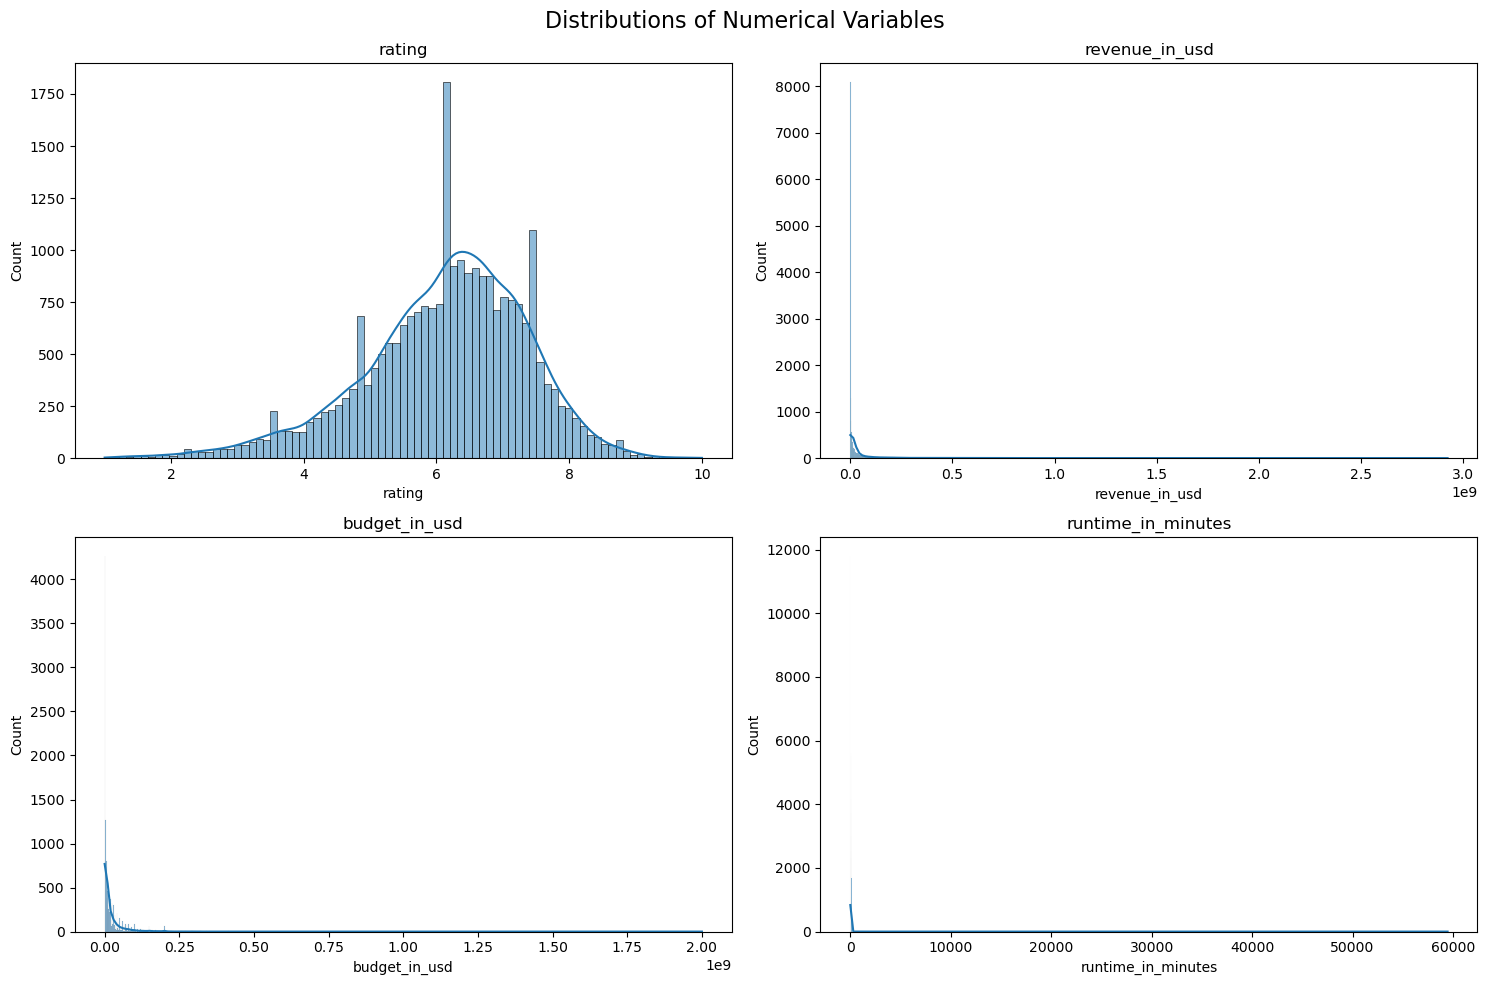

In [156]:
# Visualize distributions of numerical columns
numerical_cols = ['rating', 'revenue_in_usd', 'budget_in_usd', 'runtime_in_minutes']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distributions of Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)

plt.tight_layout()
plt.show()

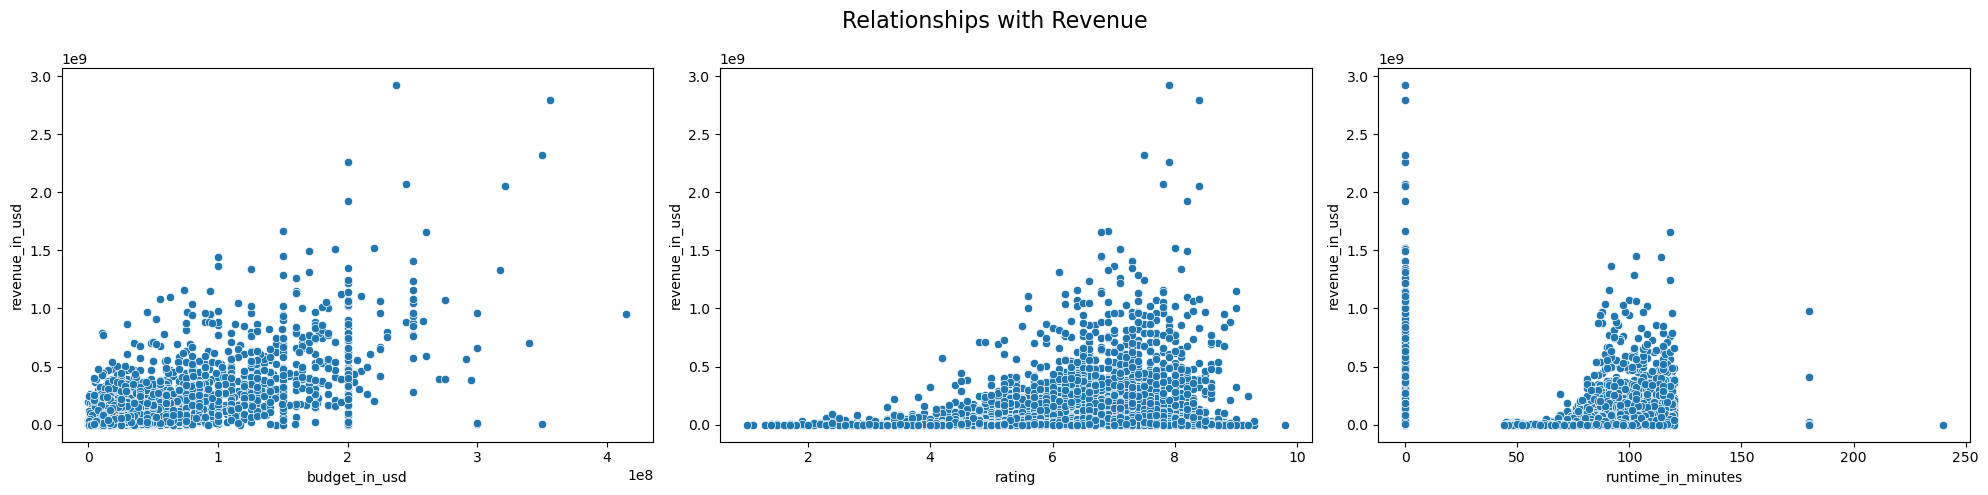

In [157]:
# Explore relationships between 'revenue_in_usd' and other numerical variables
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Relationships with Revenue', fontsize=16)

sns.scatterplot(data=df, x='budget_in_usd', y='revenue_in_usd', ax=axes[0])
sns.scatterplot(data=df, x='rating', y='revenue_in_usd', ax=axes[1])
sns.scatterplot(data=df, x='runtime_in_minutes', y='revenue_in_usd', ax=axes[2])

plt.tight_layout()
plt.show()

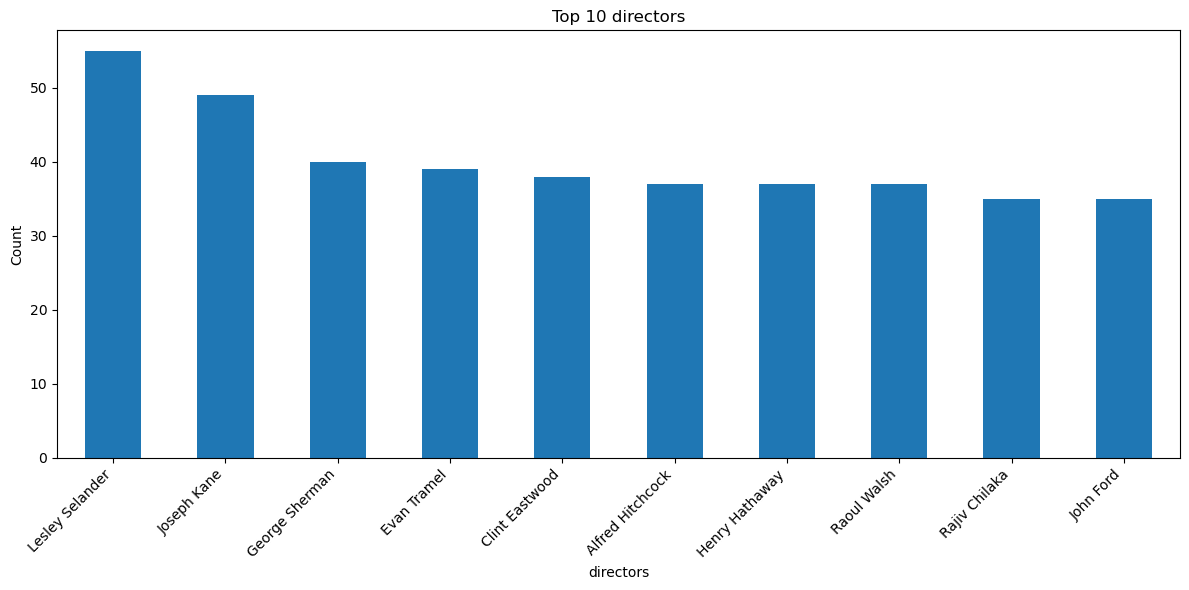

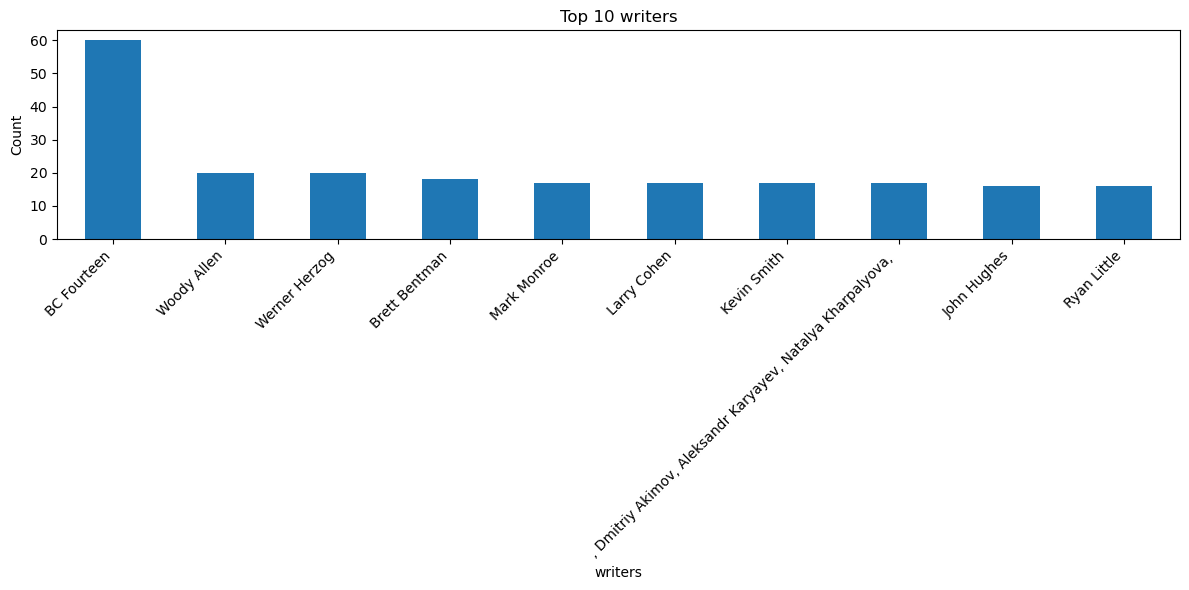

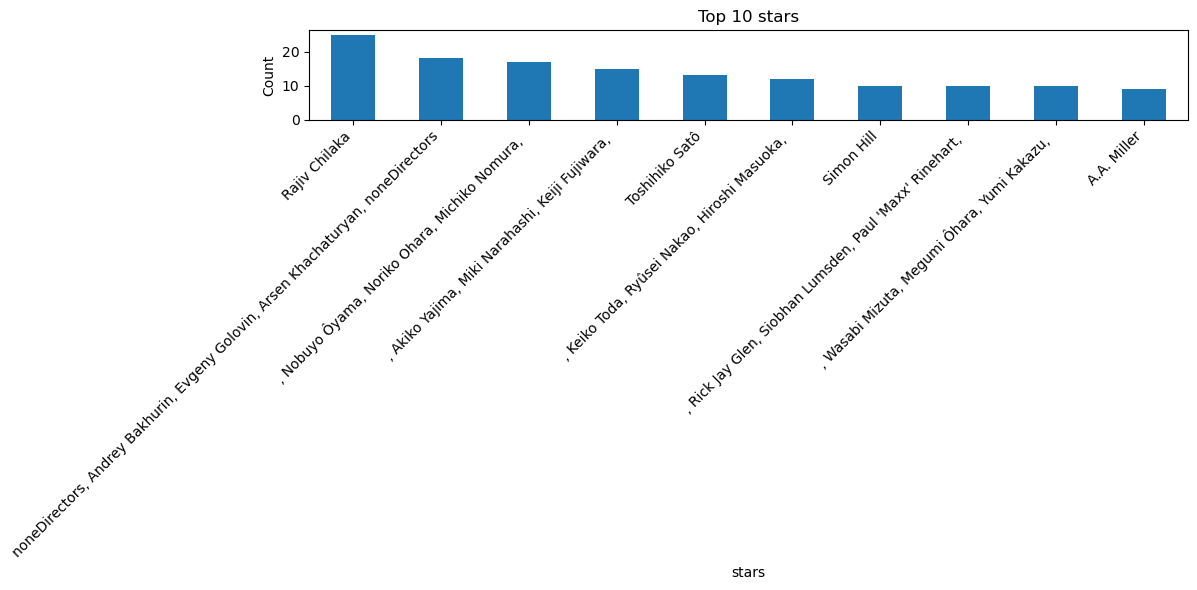

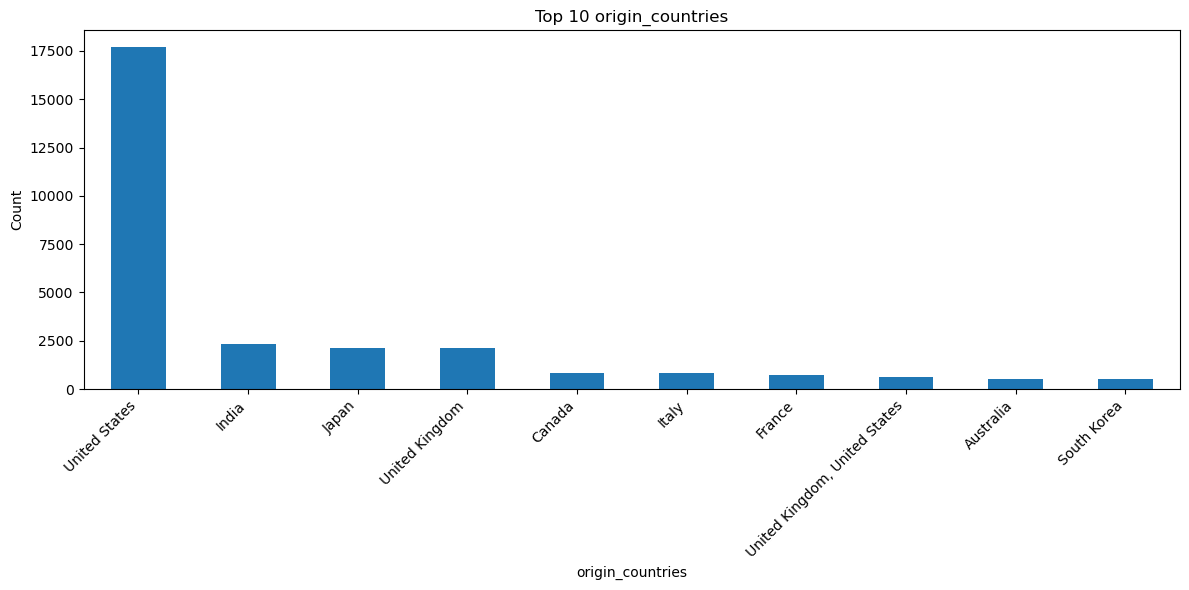

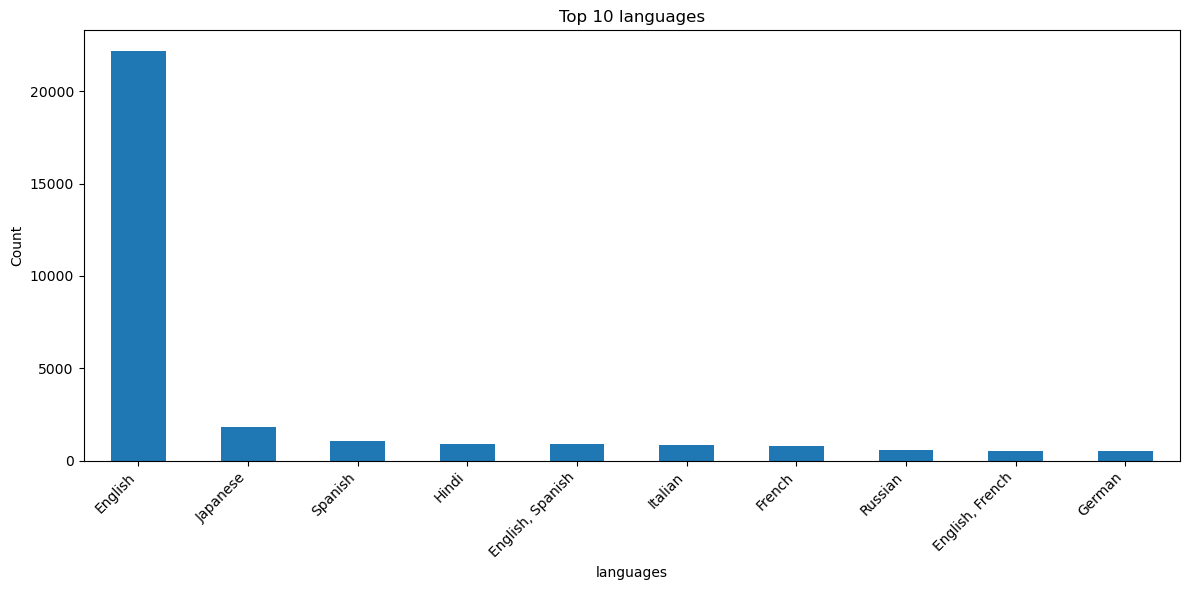

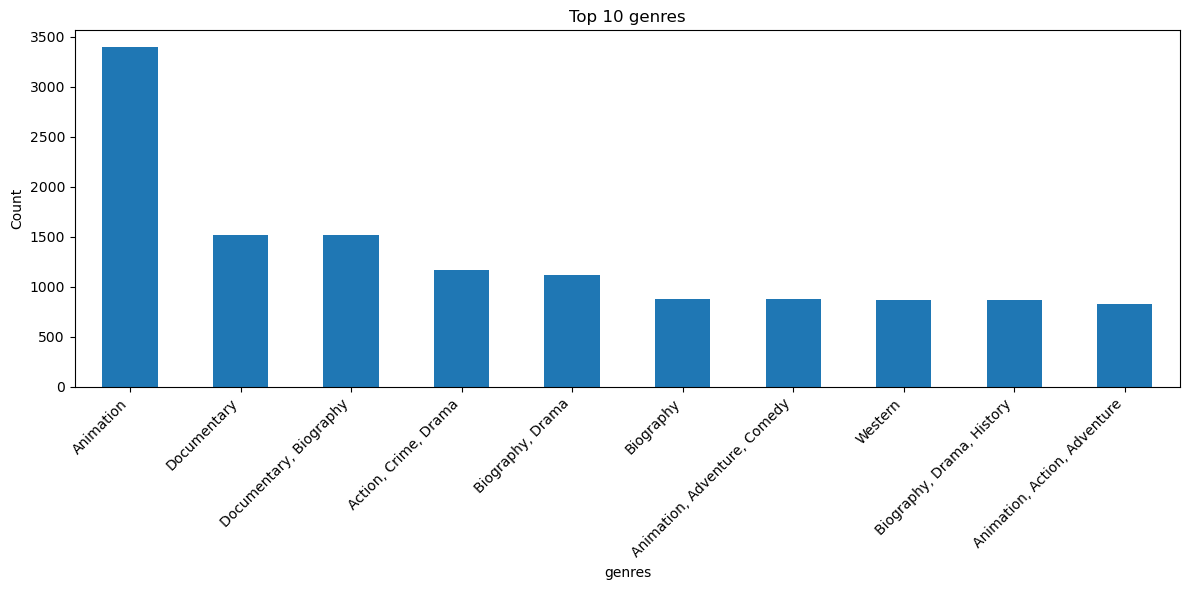

In [158]:
# Analyze categorical data
categorical_cols = ['directors', 'writers', 'stars', 'origin_countries', 'languages', 'genres']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    df[col].dropna().value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


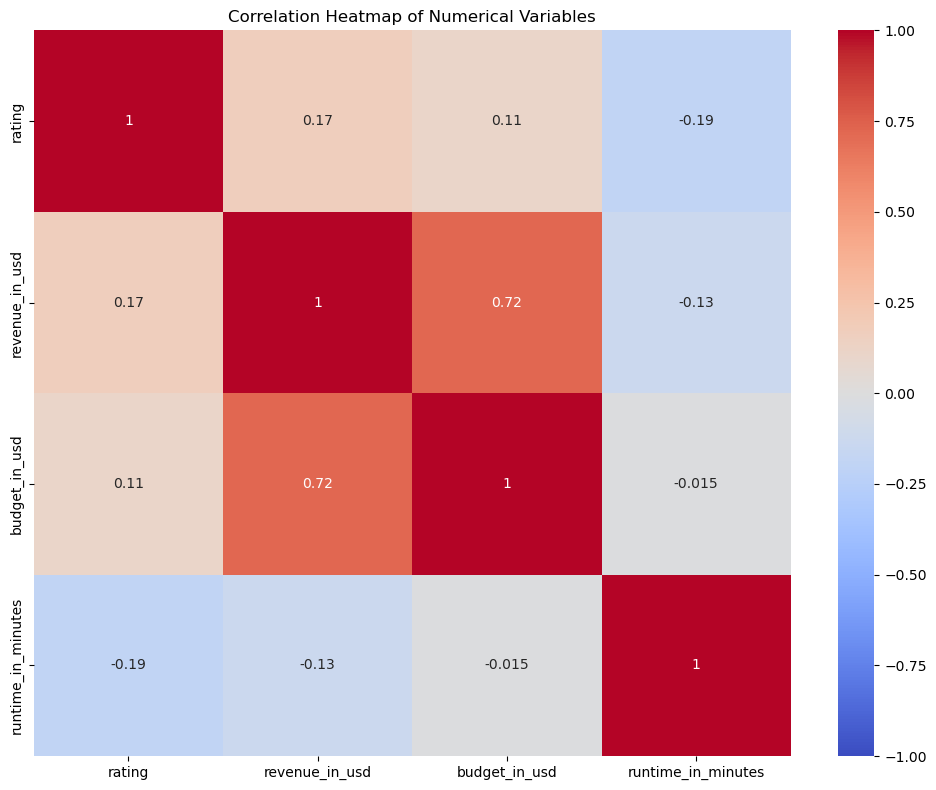

In [159]:
# Correlation heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

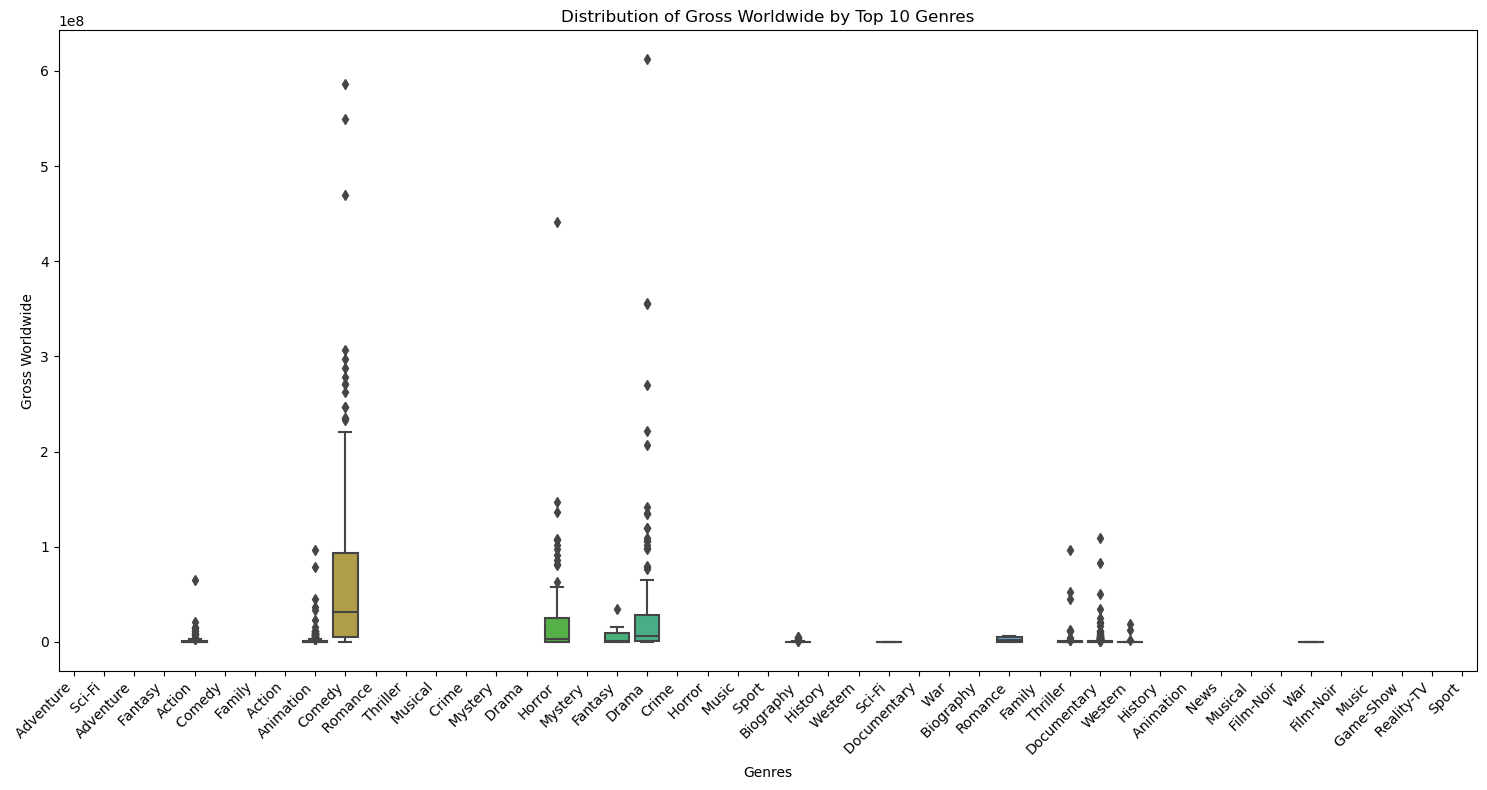

genres_split
 Adventure    1.117132e+08
 Sci-Fi       9.853647e+07
Adventure     8.142273e+07
 Fantasy      7.085559e+07
Action        6.698900e+07
 Comedy       6.213081e+07
 Family       5.419794e+07
 Action       4.710931e+07
Animation     4.440015e+07
Comedy        4.388722e+07
Name: revenue_in_usd, dtype: float64 47


In [160]:
# Box plot for 'Gross Worldwide' by 'genres'

# First, let's split the 'genres' column if it contains multiple genres per movie
df['genres_split'] = df['genres'].str.split(',')

# Explode the 'genres' column so each genre gets its own row
df_exploded = df.explode('genres_split')

# Calculate average `revenue in usd` for each genre
genre_avg = df_exploded.groupby('genres_split')['revenue_in_usd'].mean().sort_values(ascending=False)

# Get all genres
all_genres = genre_avg.head(48).index.tolist()

# Filter the dataframe to include all genres
df_top_10 = df_exploded[df_exploded['genres_split'].isin(all_genres)]

# Create the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='genres', y='revenue_in_usd', data=df_top_10, order=all_genres)
plt.title('Distribution of Gross Worldwide by Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Gross Worldwide')
plt.xlabel('Genres')
plt.tight_layout()
plt.show()

# Optional: Print average Gross Worldwide for these top 10 genres
print(genre_avg.head(10), len(genre_avg))

3. Data Cleaning and Preprocessing:
    - 3.1 Handle missing values
    - 3.2 Remove duplicates
    - 3.3 Correct data types (ensure 'Budget' and 'Gross Worldwide', 'Runtime', etc. are numerical)
    - 3.4 Handle outliers:
        - 3.4.1 Detect outliers (boxplots and IQR)
        - 3.4.2 Apply treatment methods:
            - Quantile-based Flooring and Capping
            - Trimming
            - Log Transformation
    - 3.5 Compare and discuss outcomes of outlier treatments<br /><br />


In [161]:
df.shape

(46646, 17)

4. Feature Engineering:
    - 4.1 Encode categorical variables ('Directors', 'Writers', 'Stars', 'Origin Countries', 'Languages', 'Genres' etc)
    - 4.2 Extract features from 'Storyline' using NLP techniques (optional)
    - 4.3 Create new features if applicable (e.g., director/star popularity, genre combinations) (optional)
    - 4.4 Normalize/standardize numerical features if needed<br /><br />


In [161]:
# Extract features from 'Storyline' using NLP techniques
df['storyline'] = df['storyline'].astype(str)
df['cleaned_storyline'] = (df['storyline']
                           .apply(text_wrangler.remove_digit)
                           .apply(text_wrangler.remove_punctuations)
                           .apply(text_wrangler.clean_text)
                           .apply(text_wrangler.word_lengthening)
                           .apply(text_wrangler.remove_stopwords)
                           .apply(text_wrangler.lemmatizer))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf_storyline_features = tfidf_vectorizer.fit_transform(df['cleaned_storyline'])

# Bag of Words Vectorization
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow_story_line_features = bow_vectorizer.fit_transform(df['cleaned_storyline'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf_storyline_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# do the same for bag or words

5. Feature Selection:
    - 5.1 Identify most important features for predicting 'Gross Worldwide' / revenue_usd
    - 5.2 Use correlation analysis or feature importance techniques<br /><br />


6. Natural Language Processing (if applicable):
    - 6.1 Text data cleaning
    - 6.2 Tokenization
    - 6.3 Stop word and punctuation removal
    - 6.4 Stemming or lemmatization<br /><br />


In [170]:
df['cleaned_title'] = (df['title']
                       .apply(text_wrangler.remove_digit)
                       .apply(text_wrangler.remove_punctuations)
                       .apply(text_wrangler.clean_text)
                       .apply(text_wrangler.word_lengthening)
                       .apply(text_wrangler.remove_stopwords)
                       .apply(text_wrangler.lemmatizer))

df['cleaned_storyline'] = (df['storyline']
                           .apply(text_wrangler.remove_digit)
                           .apply(text_wrangler.remove_punctuations)
                           .apply(text_wrangler.clean_text)
                           .apply(text_wrangler.word_lengthening)
                           .apply(text_wrangler.remove_stopwords)
                           .apply(text_wrangler.lemmatizer))

In [ ]:
df.head()

7. Model Selection and Training:
    - 7.1 Split data into training and testing sets
    - 7.2 Select and train multiple regression models (e.g., Linear Regression, Random Forest, Gradient Boosting)
    - 7.3 Perform cross-validation<br /><br />


8. Results and Visualization (based on regression models):
    - 8.1 Create meaningful visualizations of your findings (e.g., actual vs predicted revenues)
    - 8.2 Interpret and explain results<br /><br />


9. Unsupervised Learning:
    - 9.1 Select and apply two unsupervised learning methods
    - 9.2 Analyze and interpret results
    - 9.3 Compare outcomes of different methods
    - 9.4 Create a feature from this cluster generated and put it into the regression model 
    - 9.5 Analyse the result from the new feature you engineered    <br /><br />


10. Results and Visualization (based on unsupervised learning):
    - 10.1 Create meaningful visualizations of your findings (e.g., actual vs predicted revenues)
    - 10.2 Interpret and explain results<br /><br />


11. Conclusion and Recommendations:
    - 11.1 Summarize key findings
    - 11.2 Discuss the most influential factors for movie revenue
    - 11.3 Provide actionable insights or recommendations<br /><br />